## Problem Statement
Here, we consider a hidden Markov model (HMM) with hidden states and observations. We will find the maximum likelihood estimate of the hidden state sequence for a given sequence of observations. For this, we will implement a Viterbi decoder.

## Hidden Markov Model
The change in temperature in Chennai city is observed over the past week. Let us consider H=4 hidden states to model the unknown factors responsible for the temperature (observations). The transition probability between the hidden states and the emission matrix for the H hidden states is given below. We will also assume that all the H states are equally likely to occur at start of time.

Define O = 2 (number of observations).

In [3]:
import numpy as np
emission_matrix = np.array([[0.2,0.8],[0.5,0.5],[0.35,0.65],[0.1,0.9]])
transition_matrix = np.array([[0.35,0.15,0.25,0.25],[0.3,0.2,0.3,0.2],[0.2,0.3,0.3,0.2],[0.15,0.55,0.05,0.25]])

### Trellis Diagram :
The Trellis diagram (with H=4 states) illustrates the evolution of the system over discrete time. At any time t, the system is in one of the H hidden states.

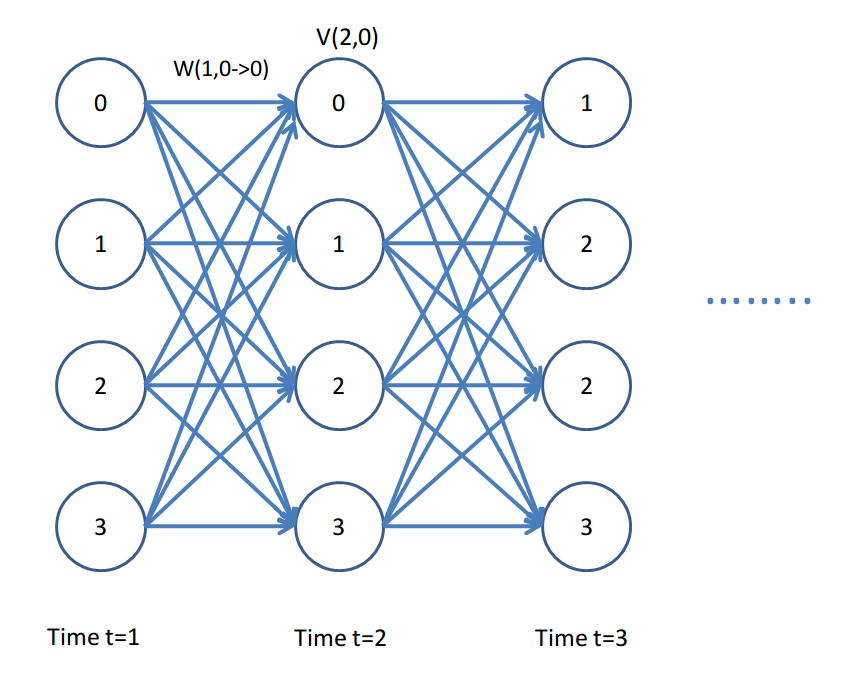

In [4]:
from IPython.display import Image
Image(filename='trellis1.png')

### Computing Weights of the Trellis
Let $o_1 o_2 \cdots o_T$ indicate a sequence of observations over time $1 \cdots T$. Consider an arrow from state h (at time t) to state h' (at time t+1). Define weight of the arrow as $W(t,h->h') = \log(Pr(o_t|h)) + \log(Pr(h' | h))$. 
    
Now, define variables for the H^2 transitions for every time $t$ and compute the values for the following output sequence - $\{0,1,0,0,1,0\}$ for $t = 1,2,3,4,5,6$.

In [23]:
out_seq = [0,1,0,0,1,0]

### Probability of a path

Notice that the logarithm of $Pr(h_1 ... h_T | o_1 ... o_T)$ is evaluated by computing the sum  $\log(\mbox{Pr}(h_1)) + \log(Pr(o_1 | h_1)) + \log(Pr(h_2|h_1)) + \log(Pr(o_2 | h_2)) + \log(Pr(h_3 | h_2)) + \cdots + \log(Pr(h_T | h_{T-1})) + \log(Pr(o_T | h_T))$ (upto an additive constant). Thus, the probability of any sequence of hidden states given the observations can simply be computed by adding the weights of the corresponding transitions along with the initial weight for the state at time t=1.

### Exhaustive Search

Compute the maximum likelihood hidden state sequence by exhaustive search along the Trellis for the above observation.

In [8]:
initial_prob = 0.25
total_prob = np.log(intial_prob)

In [20]:
def compute_prob(h_s, o_s, em, tm):
    ini_prob = 0.25
    total_prob = np.log(intial_prob) + np.log(em[h_s[0]][o_s[0]])
    for i in range(5):
        total_prob += np.log(tm[h_s[i]][h_s[i+1]]) + np.log(em[h_s[i+1]][o_s[i+1]])
        
    return total_prob

In [53]:
from itertools import combinations_with_replacement, permutations, product

#comb = list(set(combinations_with_replacement([0,1,2,3], 6)))
comb2 = list(set(product([0,1,2,3], repeat = 6)))

In [52]:
len(comb2)

4096

In [55]:
from tqdm import tqdm
mle = -9999999999
for hid_seq in tqdm(comb2):
    le = compute_prob(hid_seq, out_seq, emission_matrix, transition_matrix)
    #print(le)
    if le > mle:
        mle = le
        max_seq = hid_seq
print(mle)
print(max_seq)

100%|██████████| 4096/4096 [00:00<00:00, 19724.26it/s]


-10.344801689319434
(1, 3, 1, 2, 3, 1)


### Viterbi Algorithm 

Define value at every state and time as $V(t,h)$. Define $V(1,h) = \log(Pr(h_1 = h))$. Define $V(t+1,h) = \max_{h'} V(t,h') + \log(Pr(o_t|h')) + \log(Pr(h|h'))$. Define $Arc(t+1,h) = \arg\max_{h'} V(t,h') + \log(Pr(o_t|h')) + \log(Pr(h|h'))$ that identifies the best path leading upto to state h at time t+1.

Print $V(t,h)$ and $Arc(t,h)$ for all $t$ and $h$.

In [59]:
V = np.zeros((6,4))

for i in range(4):
    V[0,i] = np.log(0.25*emission_matrix[i][out_seq[0]])

for i in range(5):
    for j in range(4):
        max_prob = -999999
        for k in range(4):
            prob = np.log(V[0][j]) + np.log(emission_matrix[j][out_seq[i]]) + np.log(transition_matrix[j][k])
            if prob > max_prob:
                V[i][j] = prob

C:\Users\Rohit Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


### Viterbi Algorithm 

Find the maximum likelihood hidden state sequence using the Viterbi algorithm by identifying $\max_h V(T+1,h)$. The optimal hidden state sequence is identified by the best path to state $\arg\max_h V(T+1,h)$, all the way from time t=1.